<a id="top"></a>
# **8.1 Nonlinear moment-curvature relationship**

<div style="background-color:lightgray;text-align:left"> <img src="../icons/start_flag.png" alt="Previous trip" width="50" height="50">
    &nbsp; &nbsp; <b>Starting point</b> </div> 

With the coverage of bond and cracking behavior, we can now approach the simulation of a composite as a whole. The described material models can be found and used in general finite tools. It is possible to simulate the material response using 3D solid finite element models. However, in engineering practice, more specialized methods of structural analysis and design are desired which allow us to get the answers to repeating questions. A frequent application of composite materials is provided in form of a beam exposed to bending. Let us show how to utilize the models and theory explained during the previous Tours and show how to apply them to provide an efficient and general method for an assessment of a beam.   

<div style="background-color:lightgray;text-align:left"> <img src="../icons/destination.png" alt="Previous trip" width="50" height="50">
    &nbsp; &nbsp; <b>Where are we heading</b> </div> 

One fundamental concept of engineering design is to decompose a complex problem into smaller subproblems that can be described managed in a more transparent way. This concept is relevant also for the description of structural behavior. The present notebook shows such a decomposition for a nonlinear structural analysis of an arbitrarily reinforced beam. It can consider steel, carbon, glass, basalt reinforcement with correspondingly defined constitutive laws. At the same time, various cross sectional shapes can be included as well.

Using the analysis method explained in the present notebook, is is possible  to explain the fundamental differences between the design of traditional steel-reinforced concrete structures, and the innovative TRC and carbon concrete structures. Understanding of these differences is crucial for achieving more economic, durable and, thus, sustainable design of structures in the future.

# **Quick structural analysis and assessment of arbitrary beam design**

For motivation, consider some examples of concrete girders reinforced with CFRP rebars, carbon textile fabrics and AR-glass fabrics.

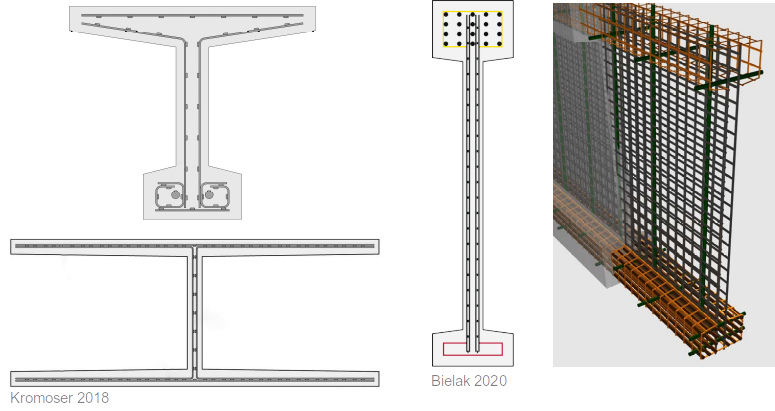

# **Beam deflection calculated by integrating curvature** 

Recalling the concepts of beam kinematics and equilibrium, we can sketch the computational scheme using the following diagram. 

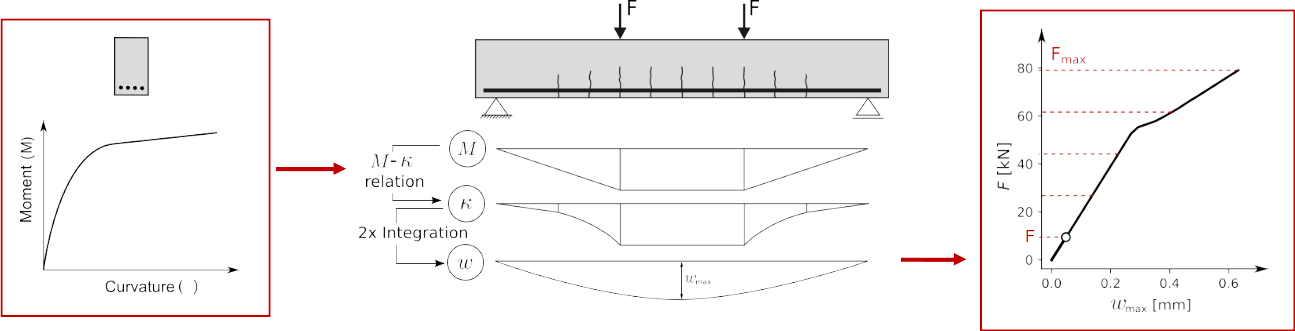

In case of a simply supported beam, the profile of bending moment is known a-priori as it does not depend on the material behavior. In other words, there are no redistribution effects along the beam. Therefore, if we know the relation between the bending moment $M$ and the local curvature $\kappa$ as depicted in the left figure above, we can calculate the deflection of the beam by integrating the curvature to obtain the cross sectional rotation, i.e.
$$
 \varphi(x) = \int_0^L \kappa(x) \, \mathrm{d}x + C
$$
and the deflection as 
$$
 w(x) = \int_0^L \varphi(x) \, \mathrm{d}x + Cx + D
$$
The integration constants must be solved for particular boundary conditions.

Given this evaluation, we can directly construct the load-deflection curve depicted in the right diagram of the above Figure. The appealing feature of this evaluation scheme is the efficiency in comparison to a nonlinear finite-element model.

# **Cross section based nonlinear constitutive law**

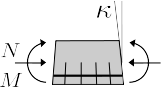

To accomplish this kind of evaluation, however, we need to derive the $M-\kappa$ relation. This relation is affected by the stress redistribution  occurring within a cross section during the cracking. The crack propagation demonstrated in the notebook [7.1](../tour7_cracking/7_1_bending3pt_2d.ipynb#top) has already demonstrated the propagation of the stress peak through the cross section. While the example shown there considered a plain concrete without reinforcement, in the present notebook, we shall consider also the effect of the reinforcement.

The computational procedure is schematically shown in the Figure below. The key assumption
saying that the cross sections remain planar and normal to the deflection curve is used to 
establish the relation between the curvature and strain profile along the beam height. Then,
the curvature can be defined as
\begin{align}
\kappa = \frac{\partial \varepsilon_{xx}}{\partial z}
\end{align}
Demoting the strains at the top and bottom of the cross section as $\varepsilon_\mathrm{top}$ and $\varepsilon_\mathrm{bot}$,
we can directly evaluate the derivative of strain over the height as
\begin{align}
\kappa = \frac{\varepsilon_\mathrm{top} - \varepsilon_\mathrm{bot}}{h}
\end{align}

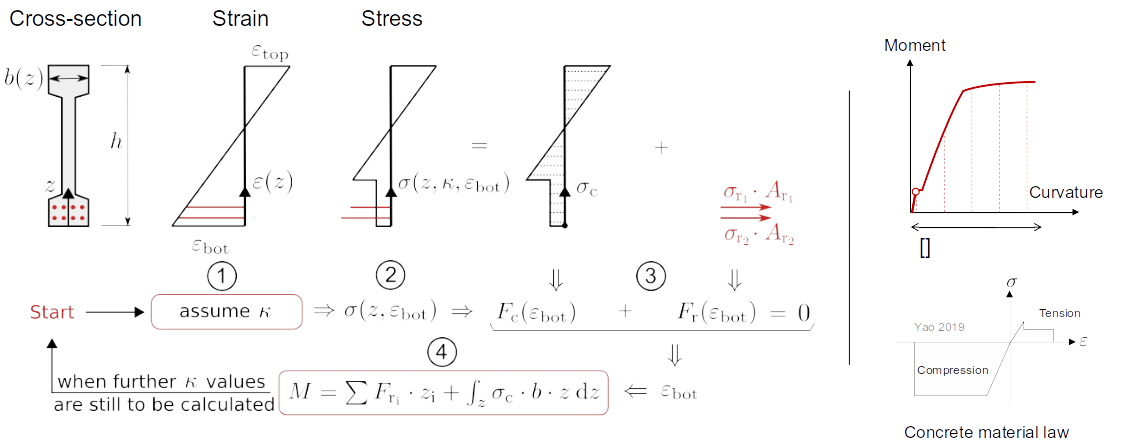

We want to establish the relation between $\kappa$ and the corresponding bending moment $M$. Therefore, the evaluation starts by prescribing the 
values of $\varepsilon_\mathrm{top}$ in a range given by the failure strain of the matrix or of the reinforcement. However, the curvature is given by two values, i.e. $\varepsilon_\mathrm{bot}$ and $\varepsilon_\mathrm{top}$. What is the value of $\varepsilon_\mathrm{bot}$ corresponding to the prescribed value of $\varepsilon_\mathrm{top}$. The answer can be found by applying the equilibrium condition requiring that the normal force within the cross section.
The force in concrete $F_\mathrm{c}$ is obtained by integrating the stress over the cross sectional height and the force in the reinforcement is obtained by summing up the crack bridging actions into F_\mathrm{r}. The equilibrium condition then reads 
$$
  F_\mathrm{c}(\varepsilon_\mathrm{bot}) + F_\mathrm{r}(\varepsilon_\mathrm{bot}) = 0
$$

Since the strain at each vertical position $z$ is known, we can use the constitutive law of the concrete matrix and of the reinforcement to evaluate the stress profile in concrete $\sigma_\mathrm{c}(z)$ over the height, so that the concrete force is given as
$$
F_\mathrm{c} = \int_0^h \sigma_\mathrm{c}(z) \cdot b \, \mathrm{d}z
$$
and the individual crack bridging force contributions of the reinforcement layers $i$ as
$$
F_\mathrm{r} = \sum_i A_{\mathrm{r},i} \sigma_{\mathrm{r},i}
$$

Finally, the $M-\kappa$ relation can be evaluated as an expression
\begin{align}
M(\kappa) = \sum_i F_{\mathrm{r},i}(\kappa) z_i + \int_z \sigma_\mathrm{c} (\kappa) z_i \, \mathrm{d} z
\end{align}

# **Model implementation**

The described scheme represents a commonly used concept of interative scheme to identify the $M-\kappa$ relation. The implementation provided here exploits the flexibility of the Python ecosystem of packages for scientific computing, in particular, the `scipy` solvers of nonlinear equations. Moreover, by introducing the integration over the cross section with a variable width, various cross sectional shapes and nonlinear constitutive laws are covered. 

The above shown model has been implemented in the model component `MKappa`.  covered range of configurations with the specification of inputs and outputs can be summarized as follows

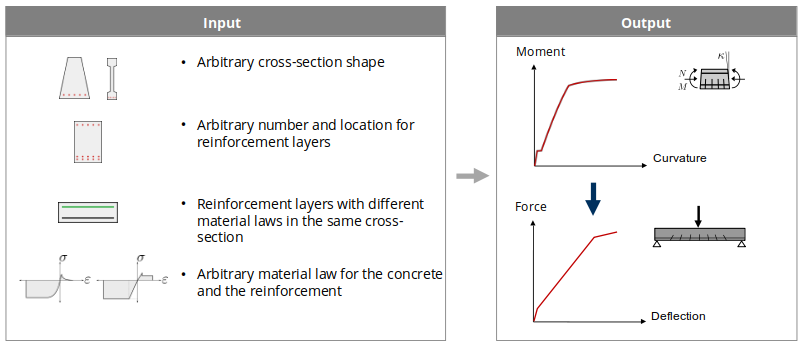

In [2]:
%matplotlib widget
from bmcs_cross_section.api import MKappa
from bmcs_cross_section.api import ReinfLayer, BarLayer, FabricLayer
from bmcs_cross_section.cs_design.cs_shape import TShape
import matplotlib.pyplot as plt

# **Concrete beam with short fibers**

To relate described model to the previously shown description of the bended beam in the notebook [7.2](../tour7_cracking/7_1_bending3pt_2d.ipynb#top), let us first simulate a beam without reinforcement. The model is constructed as follows

In [3]:
mk_plain = MKappa()

By rendering the interactive interface, we can inspect the cross sectional design `cs_design`. The attribute `matrix` specifies the material law of the matrix. The `cross_section_layout` is an empty list, because no reinforcement has been specified. Finally, 

In [4]:
mk_plain.interact()

# **Steel reinforced beam**

In [5]:
mk_steel = MKappa()
bl1 = BarLayer(name='steel 1', z=30, ds=16, count=2 )
csl = mk_steel.cross_section_layout
csl.add_layer(bl1)

In [6]:
mk_steel.interact()

## Validation of the model using experimental results

Yang et al. (2010), http://dx.doi.org/10.1016/j.engstruct.2010.07.017, Steel reinforcement

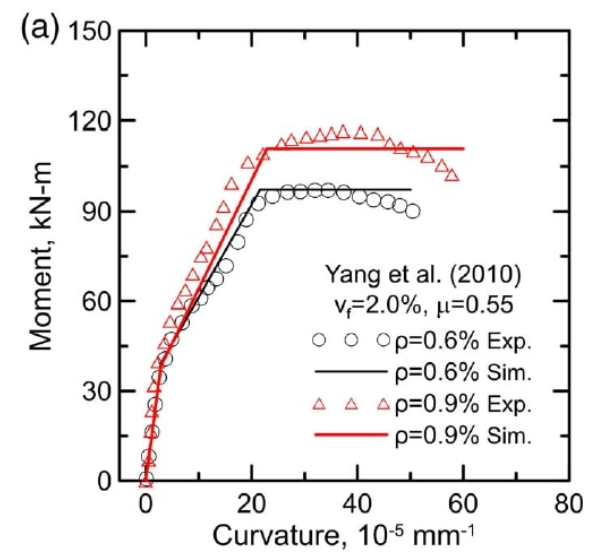

# **Carbon reinforced beam**

In [7]:
mk_carbon = MKappa(high_kappa=0.0002)
mk_carbon.cross_section_shape_.H=30
csl = mk_carbon.cross_section_layout
bl1 = FabricLayer(name='carbon 1', z=5 )
csl.add_layer(bl1)

In [8]:
mk_carbon.interact()

# **Identify the failure mechanism**

The nonlinear moment curvature curve captures the interaction between the tensile and compressive zone of a beam. Depending on the cross-sectional design, the peak load marks either the tensile or compressive failure of the cross section. The `MKappa` model component can be used to verify the cross sectional capacity calculated using the assessment rules in the design codes.

As an example, let us construct a steel reinforced cross section and configure the cross section in such a way either the compressive yielding of concrete or tensile yielding of steel will occur.

In [9]:
mk_mechanism = MKappa(high_kappa=0.0002)
bl1 = BarLayer(name='rebar 1', z=20, ds=24, count=2, matmod='steel')  # material model
bl1.matmod_.trait_set(E=200000, f_t=500)
mk_mechanism.cross_section_layout.add_layer(bl1)
mk_mechanism.cross_section_shape_.trait_set(H=100, B=300)
mk_mechanism.interact()

Exercises 

- compare with the design code concept in EC2 evaluating the moment capacity of a reinforced cross section with the obtained peak load

Points to be added

 - Reference to the iterative procedures in EC2, explain the difference and 
   that the present method is more consistent and not more complicated to implement.
 - Highlight the model components and mechanisms explained in Tours before, i.e. 
   crack-bridging action and to multiple cracking
 - Monotonic versus cyclic
 - Preconfigure the webapp for commercially available reinforcement materials

<div style="background-color:lightgray;text-align:left;width:45%;display:inline-table;"> <img src="../icons/previous.png" alt="Previous trip" width="50" height="50">
    &nbsp; <a href="../tour7_cracking/7_2_fracture_energy_ident.ipynb#top">7.2 Fracture energy identification and size effect</a> 
</div><div style="background-color:lightgray;text-align:center;width:10%;display:inline-table;"> <a href="#top"><img src="../icons/compass.png" alt="Compass" width="50" height="50"></a></div><div style="background-color:lightgray;text-align:right;width:45%;display:inline-table;"> 
    <a href="../tour8_rcbeam/8_2_rc_beam_uls_sls.ipynb#top">8.2 Reinforced beam, ultimate and serviceability limit states</a>&nbsp; <img src="../icons/next.png" alt="Previous trip" width="50" height="50"> </div> 